# Customer Segmentation through RFM Analysis: A Three-Segment Approach

In [ ]:
#Customer Segmentation through RFM Analysis: A Three-Segment Approach
#Author: Afreen N
#Co. Author: Abhinav Anand
#Version: 1.0 13 June 2024
#Reference: Customer Segmentation Using RFM Analysis: Realizing Through Python Implementation

PAPER IMPLEMENTATION

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
color= sns. color_palette()

In [ ]:
# Step 1: Data Loading
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#creating a copy of the DataFrame
df1 = df

In [ ]:
#Exploring unique values in the country column
df1.Country.nunique()

#nunique() counts the number of unique countries in the dataset.

38

In [ ]:
df1.Country.unique()

#unique() returns an array of all unique country names in the dataset.

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
#Dropping the duplicate values
customer_country= df1[['Country','CustomerID',]].drop_duplicates()
customer_country.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [ ]:
ccgc=customer_country.groupby(['Country']).sum()
ccgc['CustomerID']=ccgc['CustomerID'].astype(int)
ccgc.head()

,CustomerID
Country,
Australia,115614
Austria,137631
Bahrain,24708
Belgium,311123
Brazil,12769


In [ ]:
customer_country.groupby(['Country']).sum().reset_index().sort_values(by='CustomerID',ascending=False)
customer_country.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


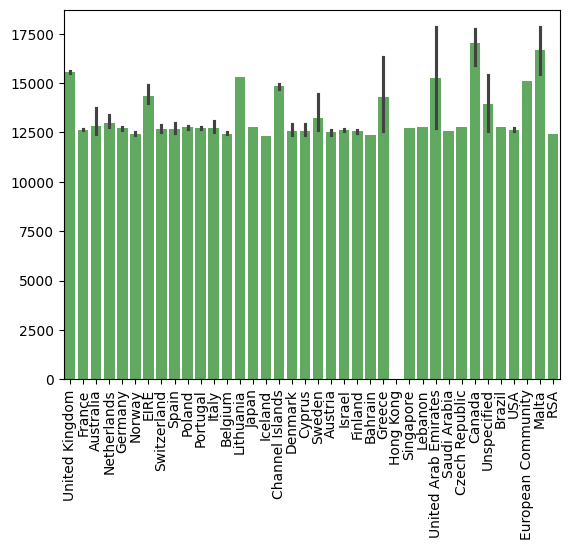

In [ ]:
country = list(customer_country["Country" ])
Cust_Id = list (customer_country['CustomerID'])
plt.Figure(figsize=(12, 9))
sns.barplot(x=country,y=Cust_Id, alpha=0.8, color=color[2])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df1=df1.loc[df1['Country']=='United Kingdom']
Cust_Id_UK= df1['CustomerID'].drop_duplicates()

In [ ]:
Cust_Id_UK.head()

0     17850.0
9     13047.0
46    13748.0
65    15100.0
82    15291.0
Name: CustomerID, dtype: float64

In [ ]:
# Calculate total price
df1['TotalPrice'] = df1['UnitPrice'] * df1['Quantity']

In [ ]:
import datetime
NOW = datetime.datetime.now()
rfmTable = df1.groupby('CustomerID').agg({
    'InvoiceDate':lambda x:(x.max()-x.min()).days,
    'InvoiceNo':lambda x:len(x),
    'TotalPrice':lambda x: x.sum()})

In [ ]:
segmented_rfm = rfmTable.rename(columns={"InvoiceDate":'Recency',
                                         'InvoiceNo':'Frequency',
                                         'TotalPrice':'Monetary'})
segmented_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,0,2,0.00
12747.0,366,103,4196.01
12748.0,372,4642,29072.10
12749.0,209,231,3868.20
12820.0,323,59,942.34


In [ ]:
def RScore_compare(r):
    if r <= 74.6:
        return 1
    elif r > 74.6 and r <= 149.2:
        return 2
    elif r > 149.2 and r <= 223.8:
        return 3
    elif r > 223.8 and r <= 298.4:
        return 4
    else:
        return 5

def FMScore_compare(r):
    if r <= 74.6:
        return 5
    elif r > 74.6 and r <= 149.2:
        return 4
    elif r > 149.2 and r <= 223.8:
        return 3
    elif r > 223.8 and r <= 298.4:
        return 2
    else:
        return 1

# Apply the functions to create the R, F, and M scores
segmented_rfm['Recency'] = segmented_rfm['Recency'].apply(RScore_compare)
segmented_rfm['Frequency'] = segmented_rfm['Frequency'].apply(FMScore_compare)
segmented_rfm['Monetary'] = segmented_rfm['Monetary'].apply(FMScore_compare)

# Combine R, F, and M scores into a single RFMScore
segmented_rfm['RFMScore'] = segmented_rfm['Recency'].astype(str) + segmented_rfm['Frequency'].astype(str) + segmented_rfm['Monetary'].astype(str)

segmented_rfm.head()

,Recency,Frequency,Monetary,RFMScore
CustomerID,,,,
12346.0,1,5,5,155
12747.0,5,4,1,541
12748.0,5,1,1,511
12749.0,3,2,1,321
12820.0,5,5,1,551


In [ ]:
# Filter and sort the DataFrame
filtered_sorted_rfm = segmented_rfm[segmented_rfm['RFMScore'] == '111'].sort_values('Monetary', ascending=False)

# Display the filtered and sorted DataFrame
print("Filtered and Sorted DataFrame:")
print(filtered_sorted_rfm)

#Customers with an RFM score of '111' are considered the least valuable

Filtered and Sorted DataFrame:
            Recency  Frequency  Monetary RFMScore
CustomerID                                       
12856.0           1          1         1      111
13521.0           1          1         1      111
13755.0           1          1         1      111
14547.0           1          1         1      111
15427.0           1          1         1      111
15993.0           1          1         1      111
16049.0           1          1         1      111
16984.0           1          1         1      111
17509.0           1          1         1      111
17813.0           1          1         1      111
17850.0           1          1         1      111


In [ ]:
# Filter and sort the DataFrame
filtered_sorted_rfm = segmented_rfm[segmented_rfm['RFMScore'] == '555'].sort_values('Monetary', ascending=False)

# Display the filtered and sorted DataFrame
print("Filtered and Sorted DataFrame:")
print(filtered_sorted_rfm)

#Customers with an RFM score of '111' are considered the most valuable

Filtered and Sorted DataFrame:
            Recency  Frequency  Monetary RFMScore
CustomerID                                       
14777.0           5          5         5      555
14865.0           5          5         5      555
17816.0           5          5         5      555


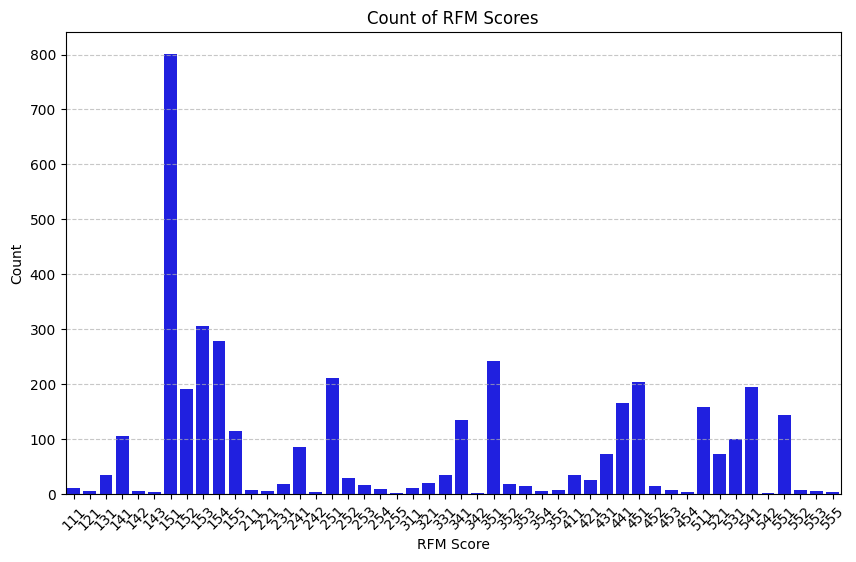

In [ ]:
# Count the occurrences of each RFMScore
rfm_score_counts = segmented_rfm['RFMScore'].value_counts().reset_index()
rfm_score_counts.columns = ['RFMScore', 'Count']

# Sort the dataframe by RFMScore for a better visualization
rfm_score_counts = rfm_score_counts.sort_values(by='RFMScore')

# Plot a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='RFMScore', y='Count', data=rfm_score_counts, color='blue')
plt.title('Count of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**IMPROVEMENT AND EXTENTION OF PAPER WITH LINGUISTIC LABELS**

Plotting Customer Distribution by country

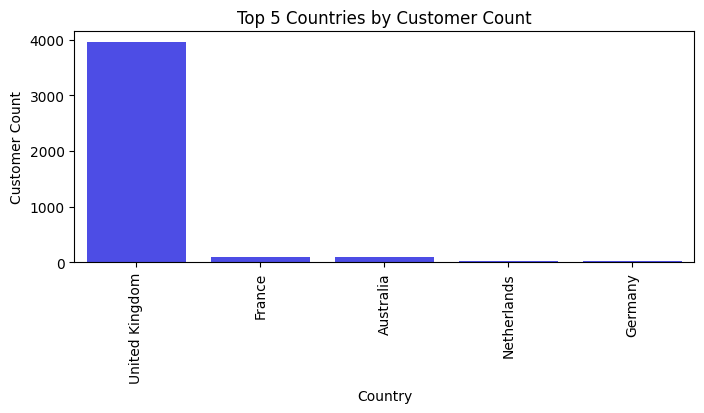

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming customer_country is a DataFrame that has been previously defined
country = list(customer_country["Country"].unique())[:5]
Cust_count = list(customer_country['Country'].value_counts())[:5]

# Create the plot
plt.figure(figsize=(8, 3))
sns.barplot(x=country, y=Cust_count, alpha=0.8, color='blue')  # Assuming color[2] was blue
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Customer Count')
plt.title('Top 5 Countries by Customer Count')
plt.show()


In [ ]:
#Explore the data
#Eyballing
df1.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
92004,544167,22727,ALARM CLOCK BAKELIKE RED,4,2011-02-16 13:14:00,3.75,14755.0,United Kingdom,15.00
78702,542895,22469,HEART OF WICKER SMALL,1,2011-02-01 13:47:00,1.65,14549.0,United Kingdom,1.65
470174,576617,22817,CARD SUKI BIRTHDAY,2,2011-11-15 16:57:00,0.42,NaN,United Kingdom,0.84
86422,543546,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1,2011-02-09 16:52:00,10.79,NaN,United Kingdom,10.79
458577,575843,23582,VINTAGE DOILY JUMBO BAG RED,1,2011-11-11 12:02:00,2.08,14446.0,United Kingdom,2.08
58023,541219,22175,PINK OWL SOFT TOY,1,2011-01-14 14:06:00,5.79,NaN,United Kingdom,5.79
539275,581439,23581,JUMBO BAG PAISLEY PARK,1,2011-12-08 16:30:00,4.13,NaN,United Kingdom,4.13
448725,575070,22431,WATERING CAN BLUE ELEPHANT,1,2011-11-08 12:58:00,1.95,17841.0,United Kingdom,1.95
311509,564302,21262,WHITE GOOSE FEATHER CHRISTMAS TREE,6,2011-08-24 12:00:00,2.95,15932.0,United Kingdom,17.70
329075,565840,23202,JUMBO BAG VINTAGE LEAF,2,2011-09-07 12:02:00,4.13,NaN,United Kingdom,8.26


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495478 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
 8   TotalPrice   495478 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.8+ MB


In [ ]:
# Load the dataset with the specified encoding
df2 = df.copy()
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df2.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df2.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df2.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
67250,541827,84251G,"GREETING CARD, OVERCROWDED POOL.",1,2011-01-21 17:05:00,0.42,NaN,United Kingdom
484411,577531,22900,SET 2 TEA TOWELS I LOVE LONDON,3,2011-11-20 13:58:00,4.13,NaN,United Kingdom
175260,551944,22697,GREEN REGENCY TEACUP AND SAUCER,1,2011-05-05 11:08:00,2.95,14553.0,United Kingdom
226564,556812,21358,TOAST ITS - HAPPY BIRTHDAY,1,2011-06-14 17:25:00,2.46,NaN,United Kingdom
402122,571465,21245,GREEN POLKADOT PLATE,4,2011-10-17 14:29:00,1.69,14830.0,United Kingdom
488016,577791,22550,HOLIDAY FUN LUDO,4,2011-11-21 16:36:00,3.75,17100.0,United Kingdom
286687,562034,23245,SET OF 3 REGENCY CAKE TINS,4,2011-08-02 09:14:00,4.95,12449.0,Belgium
283997,561820,22400,MAGNETS PACK OF 4 HOME SWEET HOME,1,2011-07-29 16:00:00,2.46,NaN,United Kingdom
27163,538524,47563A,RETRO LONGBOARD IRONING BOARD COVER,1,2010-12-13 09:35:00,5.91,NaN,United Kingdom
271555,560700,85099B,JUMBO BAG RED RETROSPOT,10,2011-07-20 12:38:00,2.08,17229.0,United Kingdom


In [ ]:
df3=df2

In [ ]:
import pandas as pd

# Assuming segmented_rfm is your DataFrame
df2 = segmented_rfm.copy()

# Determine the number of bins to create
num_bins = 3

# Use pd.cut for consistent binning
df2['Rbin'] = pd.cut(df2['Recency'], bins=num_bins, labels=['Recent', 'Moderate', 'Least Recent'])
df2['Fbin'] = pd.cut(df2['Frequency'], bins=num_bins, labels=['Infrequent', 'Occational', 'Frequent'])
df2['Mbin'] = pd.cut(df2['Monetary'], bins=num_bins, labels=['Low Spender', 'Average Spender', 'High Spender'])

# Display the first few rows of the table
df2[['Recency', 'Rbin', 'Frequency', 'Fbin', 'Monetary', 'Mbin']]


,Recency,Rbin,Frequency,Fbin,Monetary,Mbin
CustomerID,,,,,,
12346.0,1,Recent,5,Frequent,5,High Spender
12747.0,5,Least Recent,4,Frequent,1,Low Spender
12748.0,5,Least Recent,1,Infrequent,1,Low Spender
12749.0,3,Moderate,2,Infrequent,1,Low Spender
12820.0,5,Least Recent,5,Frequent,1,Low Spender
...,...,...,...,...,...,...
18280.0,1,Recent,5,Frequent,3,Average Spender
18281.0,1,Recent,5,Frequent,4,High Spender
18282.0,2,Recent,5,Frequent,3,Average Spender


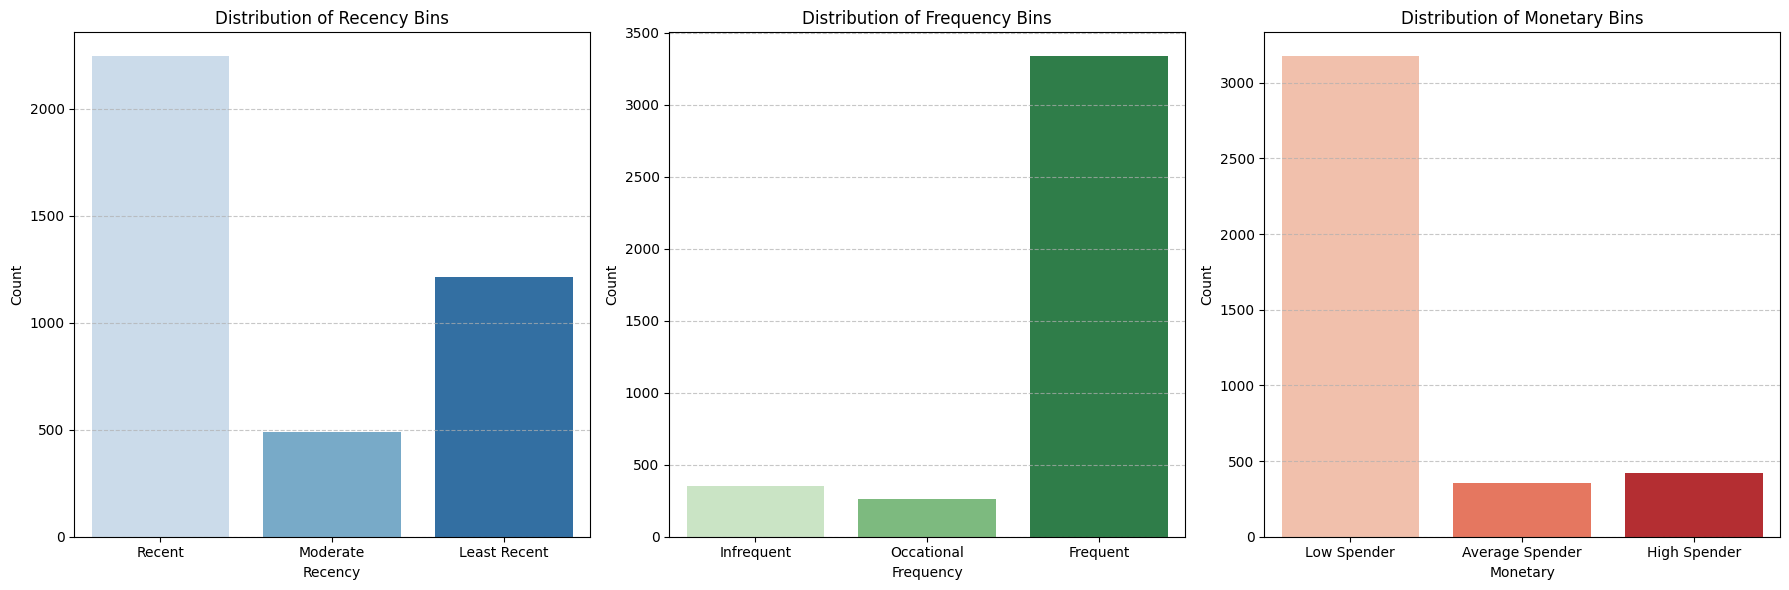

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Recency bins
sns.countplot(ax=axes[0], x='Rbin', data=df2, order=['Recent', 'Moderate', 'Least Recent'], palette='Blues')
axes[0].set_title('Distribution of Recency Bins')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Frequency bins
sns.countplot(ax=axes[1], x='Fbin', data=df2, order=['Infrequent', 'Occational', 'Frequent'], palette='Greens')
axes[1].set_title('Distribution of Frequency Bins')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Monetary bins
sns.countplot(ax=axes[2], x='Mbin', data=df2, order=['Low Spender', 'Average Spender', 'High Spender'], palette='Reds')
axes[2].set_title('Distribution of Monetary Bins')
axes[2].set_xlabel('Monetary')
axes[2].set_ylabel('Count')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
# Create cross-tabulation table for Recency and Monetary
crosstab_rm = pd.crosstab(df2['Rbin'], df2['Mbin'])
print("Cross-tabulation between Recency and Monetary:")
print(crosstab_rm)

# Create cross-tabulation table for Recency and Frequency
crosstab_rf = pd.crosstab(df2['Rbin'], df2['Fbin'])
print("\nCross-tabulation between Recency and Frequency:")
print(crosstab_rf)

# Create cross-tabulation table for Frequency and Monetary
crosstab_fm = pd.crosstab(df2['Fbin'], df2['Mbin'])
print("\nCross-tabulation between Frequency and Monetary:")
print(crosstab_fm)

Cross-tabulation between Recency and Monetary:
Mbin          Low Spender  Average Spender  High Spender
Rbin                                                    
Recent               1517              325           402
Moderate              463               15            13
Least Recent         1195               13             7

Cross-tabulation between Recency and Frequency:
Fbin          Infrequent  Occational  Frequent
Rbin                                          
Recent                29          53      2162
Moderate              31          35       425
Least Recent         292         173       750

Cross-tabulation between Frequency and Monetary:
Mbin        Low Spender  Average Spender  High Spender
Fbin                                                  
Infrequent          352                0             0
Occational          261                0             0
Frequent           2562              353           422


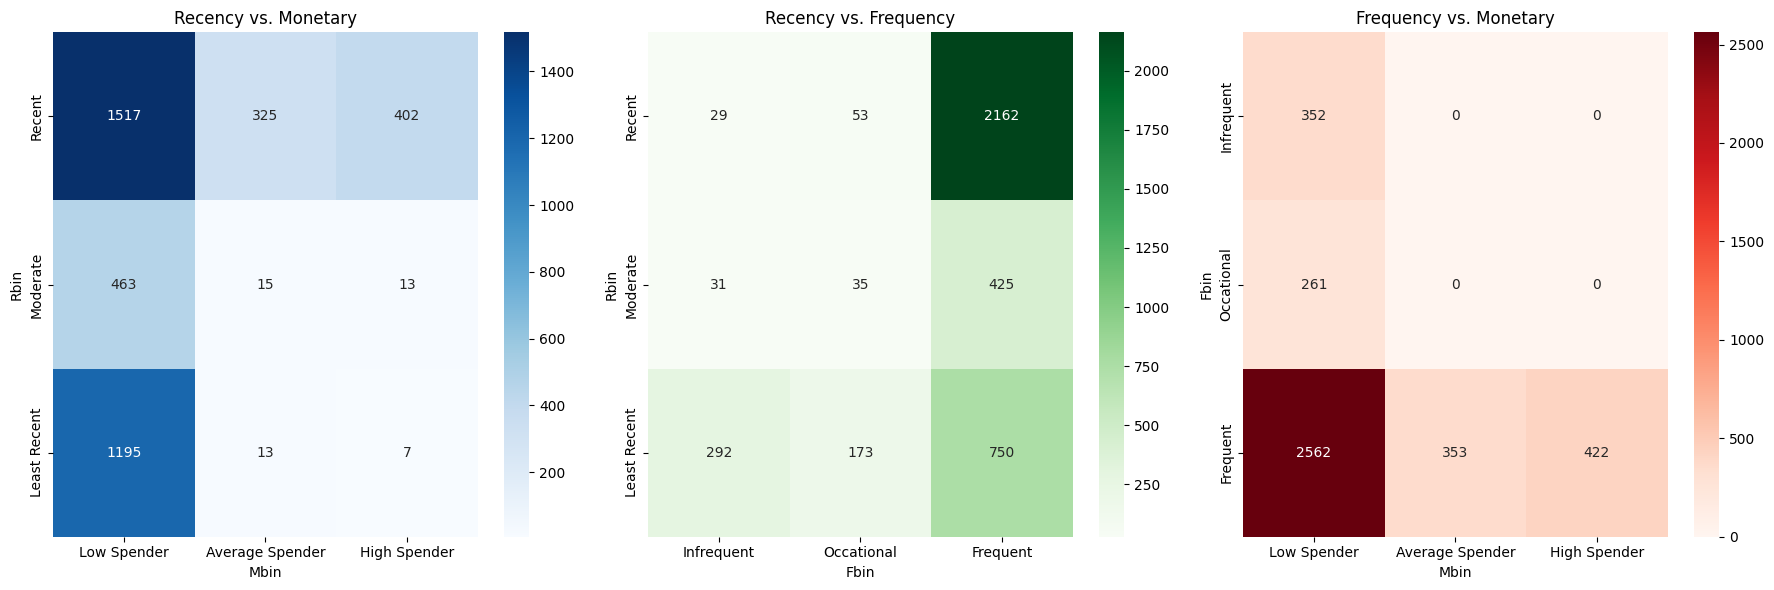

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Heatmap for Cross-tabulation between Recency and Monetary
sns.heatmap(crosstab_rm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Recency vs. Monetary")

# Heatmap for Cross-tabulation between Recency and Frequency
sns.heatmap(crosstab_rf, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Recency vs. Frequency")

# Heatmap for Cross-tabulation between Frequency and Monetary
sns.heatmap(crosstab_fm, annot=True, fmt="d", cmap="Reds", ax=axes[2])
axes[2].set_title("Frequency vs. Monetary")

plt.tight_layout()
plt.show()

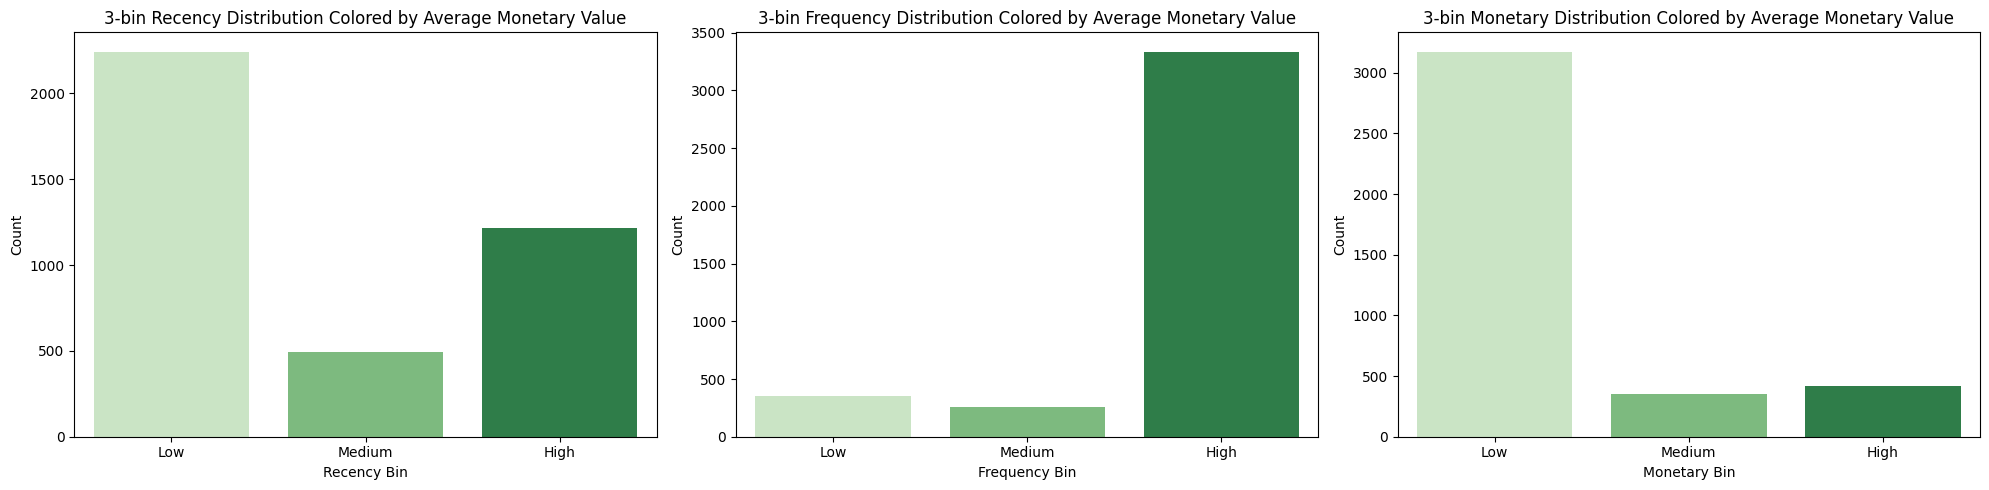

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming segmented_rfm is your DataFrame
df2 = segmented_rfm.copy()

# Define 3-bin segmentation
num_bins = 3
df2['Rbin_3'] = pd.cut(df2['Recency'], bins=num_bins, labels=['Low', 'Medium', 'High'])
df2['Fbin_3'] = pd.cut(df2['Frequency'], bins=num_bins, labels=['Low', 'Medium', 'High'])
df2['Mbin_3'] = pd.cut(df2['Monetary'], bins=num_bins, labels=['Low', 'Medium', 'High'])

# Compute the average Monetary value for each bin
mean_monetary_recency_3 = df2.groupby('Rbin_3')['Monetary'].mean()
mean_monetary_frequency_3 = df2.groupby('Fbin_3')['Monetary'].mean()
mean_monetary_monetary_3 = df2.groupby('Mbin_3')['Monetary'].mean()

# Define a color palette
palette = sns.color_palette("coolwarm", as_cmap=True)

# Map the average Monetary values to colors
monetary_colors_recency_3 = mean_monetary_recency_3.apply(lambda x: palette(x / mean_monetary_recency_3.max()))
monetary_colors_frequency_3 = mean_monetary_frequency_3.apply(lambda x: palette(x / mean_monetary_frequency_3.max()))
monetary_colors_monetary_3 = mean_monetary_monetary_3.apply(lambda x: palette(x / mean_monetary_monetary_3.max()))

# Plot Recency, Frequency, and Monetary distributions for 3-bin segmentation
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
recency_plot_3 = sns.barplot(x=mean_monetary_recency_3.index, y=df2['Rbin_3'].value_counts().sort_index(),
                             palette='Greens')
plt.title('3-bin Recency Distribution Colored by Average Monetary Value')
plt.xlabel('Recency Bin')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
frequency_plot_3 = sns.barplot(x=mean_monetary_frequency_3.index, y=df2['Fbin_3'].value_counts().sort_index(),
                               palette='Greens')
plt.title('3-bin Frequency Distribution Colored by Average Monetary Value')
plt.xlabel('Frequency Bin')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
monetary_plot_3 = sns.barplot(x=mean_monetary_monetary_3.index, y=df2['Mbin_3'].value_counts().sort_index(),
                              palette='Greens')
plt.title('3-bin Monetary Distribution Colored by Average Monetary Value')
plt.xlabel('Monetary Bin')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Analysis and Insights Recency Analysis (3-bin  Segmentation):

Distribution: The count of customers across different Recency bins can reveal how recently the majority of customers have interacted with the business. Higher counts in the "Low" recency bin indicate that a large portion of customers have interacted recently. Monetary Insights: By coloring the bins based on average monetary value, we can see if recent interactions are associated with higher spending. If the "Low" recency bin has a darker color (indicating higher monetary value), it suggests that recent customers tend to spend more. Frequency Analysis (3-bin  Segmentation):

Distribution: The count of customers across different Frequency bins shows how often customers are making purchases. Higher counts in the "High" frequency bin indicate a loyal customer base. Monetary Insights: Similarly, coloring the bins based on average monetary value helps identify if more frequent purchases are associated with higher spending. If the "High" frequency bin is darker, frequent customers are more valuable. Comparative Insights:

Customer Segmentation: Comparing the Recency and Frequency distributions helps identify key customer segments. For example, customers who are both recent and frequent purchasers are highly valuable. Business Strategy: Understanding the distribution and monetary value associated with each bin can inform marketing strategies. For instance, customers in the "Low" recency but "High" frequency bin might benefit from re-engagement campaigns to bring them back. By visualizing and analyzing these distributions, businesses can better understand their customer base and tailor their strategies to maximize customer value and retention.

<Axes: ylabel='Density'>

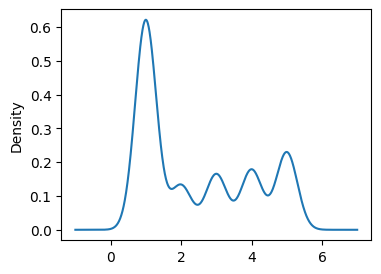

In [ ]:
#Univariate Analysis
#when customer doesnt come for 3 months, increase coupons.
df2.Recency.plot.density(figsize=(4,3))

<Axes: >

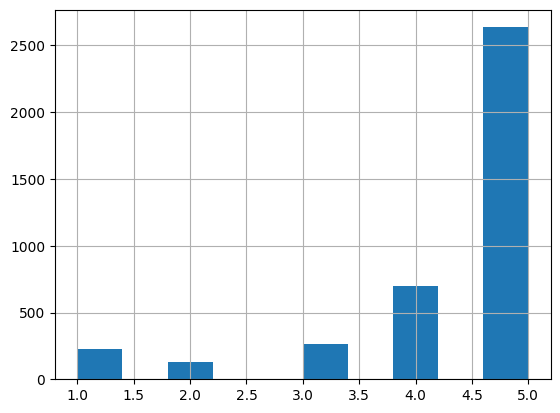

In [ ]:
df2.Frequency.hist()

<Axes: ylabel='Frequency'>

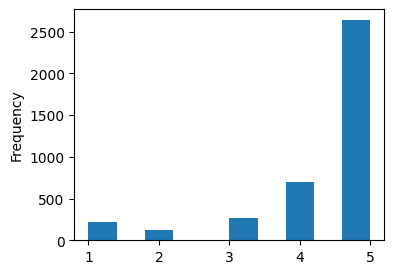

In [ ]:
df2[df2.Frequency<500].Frequency.plot.hist(figsize=(4,3))

<Axes: ylabel='Frequency'>

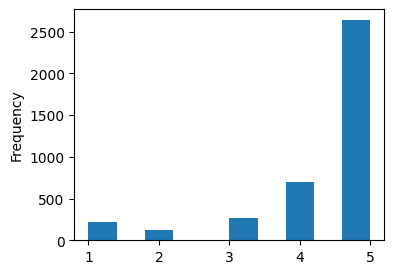

In [ ]:
df2[df2.Frequency<100].Frequency.plot.hist(figsize=(4,3))#30 is avg...

<Axes: ylabel='Density'>

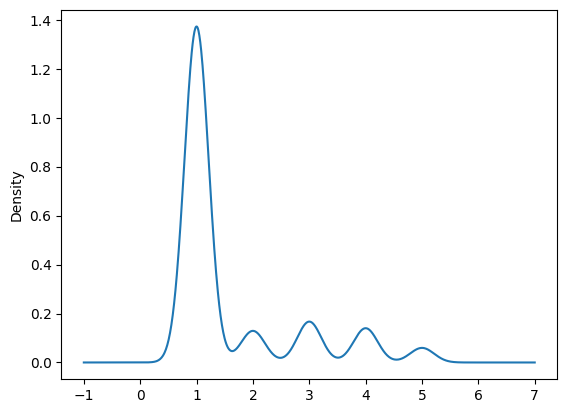

In [ ]:
df2.Monetary.plot.density()

<Axes: ylabel='Density'>

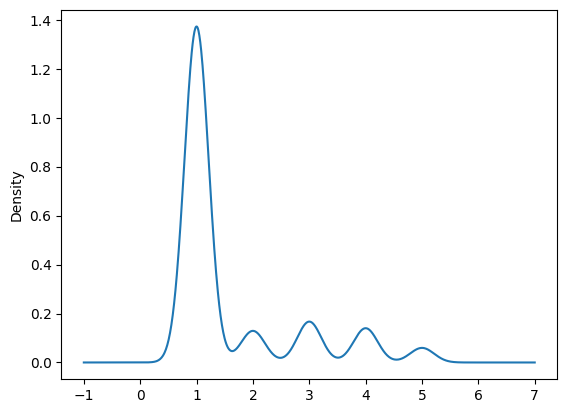

In [ ]:
df2[df2.Monetary<500].Monetary.plot.density()

In [ ]:
df2.Monetary.mean()

1.600253164556962

In [ ]:
df2[df2.Monetary<500].Monetary.mean()

1.600253164556962

In [ ]:
df2.Frequency.mean()

4.366329113924051

In [ ]:
df2[df2.Frequency<100].Frequency.mean()

4.366329113924051

<Axes: >

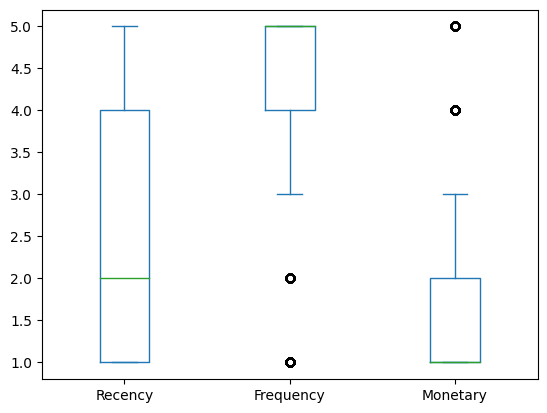

In [ ]:
df2.plot.box()

In [ ]:
df2.Frequency.count()

3950

In [ ]:
df2.Recency.count()

3950

In [ ]:
df2.Monetary.count()

3950

In [ ]:
df2[df2.Recency>325].count()

Recency      0
Frequency    0
Monetary     0
RFMScore     0
Rbin_3       0
Fbin_3       0
Mbin_3       0
dtype: int64

In [ ]:
Q1 = df2['Frequency'].quantile(0.25)
Q3 = df2['Frequency'].quantile(0.75)
IQR = Q3 - Q1

# Count outliers
outliers = ((df2['Frequency'] < (Q1 - 1.5 * IQR)) | (df2['Frequency'] > (Q3 + 1.5 * IQR)))
num_outliers = outliers.sum()

print(f'Number of outliers in Frequency column: {num_outliers}')

Number of outliers in Frequency column: 352


In [ ]:
Qa1 = df2['Monetary'].quantile(0.25)
Qa3 = df2['Monetary'].quantile(0.75)
IQRa = Qa3 - Qa1

# Count outliers
outliers = ((df2['Monetary'] < (Qa1 - 1.5 * IQRa)) | (df2['Monetary'] > (Qa3 + 1.5 * IQRa)))
num_outliers = outliers.sum()

print(f'Number of outliers in Monetary column: {num_outliers}')

Number of outliers in Monetary column: 422


In [ ]:
Q1 = df2['Frequency'].quantile(0.25)
Q3 = df2['Frequency'].quantile(0.75)
IQR = Q3 - Q1

Qa1 = df2['Monetary'].quantile(0.25)
Qa3 = df2['Monetary'].quantile(0.75)
IQRa = Qa3 - Qa1

# Define the conditions to filter out outliers
outliers_Frequency = ((df2['Frequency'] < (Qa1 - 1.5 * IQR)) | (df2['Frequency'] > (Q3 + 1.5 * IQR)))
outliers_Monetary = ((df2['Monetary'] < (Qa1 - 1.5 * IQRa)) | (df2['Monetary'] > (Qa3 + 1.5 * IQRa)))

# Create a new DataFrame without outliers
df2_no_outliers = df2[~(outliers_Frequency | outliers_Monetary)]

# Add the 'Recency' column to the new DataFrame
df2_no_outliers['Recency'] = df2['Recency']

# Print the shape of the new DataFrame to compare
print(f'Shape of original DataFrame: {df2.shape}')
print(f'Shape of DataFrame without outliers: {df2_no_outliers.shape}')

Shape of original DataFrame: (3950, 7)
Shape of DataFrame without outliers: (3528, 7)


In [ ]:
df2

,Recency,Frequency,Monetary,RFMScore,Rbin_3,Fbin_3,Mbin_3
CustomerID,,,,,,,
12346.0,1,5,5,155,Low,High,High
12747.0,5,4,1,541,High,High,Low
12748.0,5,1,1,511,High,Low,Low
12749.0,3,2,1,321,Medium,Low,Low
12820.0,5,5,1,551,High,High,Low
...,...,...,...,...,...,...,...
18280.0,1,5,3,153,Low,High,Medium
18281.0,1,5,4,154,Low,High,High
18282.0,2,5,3,253,Low,High,Medium


In [ ]:
# Add Recency, RFMScore, Rbin_3, Fbin_3, and Mbin_3 from df2 to df2_no_outliers
df2_no_outliers['Recency'] = df2['Recency']
df2_no_outliers['RFMScore'] = df2['RFMScore']
df2_no_outliers['Rbin_3'] = df2['Rbin_3']
df2_no_outliers['Fbin_3'] = df2['Fbin_3']
df2_no_outliers['Mbin_3'] = df2['Mbin_3']

# Remove rows with null or NaN values
df2_no_outliers = df2_no_outliers.dropna()

In [ ]:
# Print the shape of the new DataFrame
print(f'Shape of DataFrame without outliers and NaN values: {df2_no_outliers.shape}')

Shape of DataFrame without outliers and NaN values: (3528, 7)


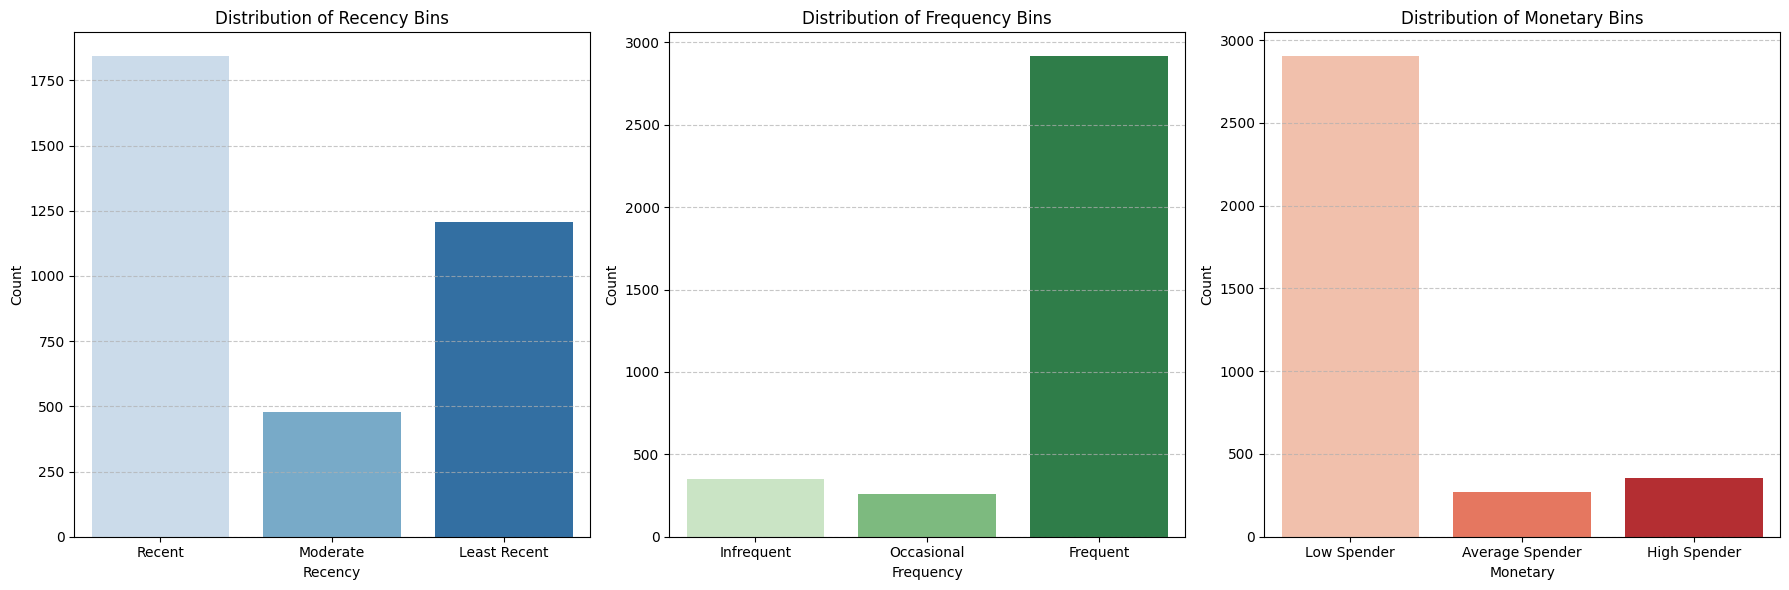

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the number of bins to create
num_bins = 3

# Use pd.cut for consistent binning
df2_no_outliers['Rbin'] = pd.cut(df2_no_outliers['Recency'], bins=num_bins, labels=['Recent', 'Moderate', 'Least Recent'])
df2_no_outliers['Fbin'] = pd.cut(df2_no_outliers['Frequency'], bins=num_bins, labels=['Infrequent', 'Occasional', 'Frequent'])
df2_no_outliers['Mbin'] = pd.cut(df2_no_outliers['Monetary'], bins=num_bins, labels=['Low Spender', 'Average Spender', 'High Spender'])

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Recency bins
sns.countplot(ax=axes[0], x='Rbin', data=df2_no_outliers, order=['Recent', 'Moderate', 'Least Recent'], palette='Blues')
axes[0].set_title('Distribution of Recency Bins')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Frequency bins
sns.countplot(ax=axes[1], x='Fbin', data=df2_no_outliers, order=['Infrequent', 'Occasional', 'Frequent'], palette='Greens')
axes[1].set_title('Distribution of Frequency Bins')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Monetary bins
sns.countplot(ax=axes[2], x='Mbin', data=df2_no_outliers, order=['Low Spender', 'Average Spender', 'High Spender'], palette='Reds')
axes[2].set_title('Distribution of Monetary Bins')
axes[2].set_xlabel('Monetary')
axes[2].set_ylabel('Count')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming df2 is your DataFrame with the necessary columns
df2 = segmented_rfm.copy()

# Define 3-bin segmentation
num_bins = 3
df2['Rbin_3'] = pd.cut(df2['Recency'], bins=num_bins, labels=['Low', 'Medium', 'High'])
df2['Fbin_3'] = pd.cut(df2['Frequency'], bins=num_bins, labels=['Low', 'Medium', 'High'])
df2['Mbin_3'] = pd.cut(df2['Monetary'], bins=num_bins, labels=['Low', 'Medium', 'High'])

# Create a 3D scatter plot
fig = px.scatter_3d(df2,
                    x='Recency',
                    y='Frequency',
                    z='Monetary',
                    color='Mbin_3',
                    labels={'Recency': 'Recency', 'Frequency': 'Frequency', 'Monetary': 'Monetary'},
                    title='3D Scatter Plot of Recency, Frequency, and Monetary Values')

# Update layout to set the camera angle
fig.update_layout(scene=dict(
    xaxis_title='Recency',
    yaxis_title='Frequency',
    zaxis_title='Monetary'
))

# Set the initial camera angle
camera = dict(
    eye=dict(x=1.5, y=1.5, z=1.5)  # Adjust these values to get the desired view angle
)
fig.update_layout(scene_camera=camera)

# Show the plot
fig.show()

Analysis
Interactive Exploration: The 3D plot allows you to rotate, zoom, and pan to explore the data points from different angles.
View Adjustment: By adjusting the eye values in the camera dictionary, you can set the initial view to an angle that best displays the data points.
Color Coding: The data points are color-coded based on the Monetary bins, providing a visual cue to identify high, medium, and low monetary value segments.
Insights
Customer Segmentation: The 3D plot helps in identifying clusters of customers based on their recency, frequency, and monetary values.
High-Value Customers: By examining the plot, you can easily identify high-value customers (those with high recency, frequency, and monetary values) and understand their distribution.
Marketing Strategies: This visualization aids in devising targeted marketing strategies by visually analyzing customer segments and their characteristics.
By using an interactive 3D plot, you can gain a more comprehensive understanding of the relationships between Recency, Frequency, and Monetary values and how they interact to form different customer segments.

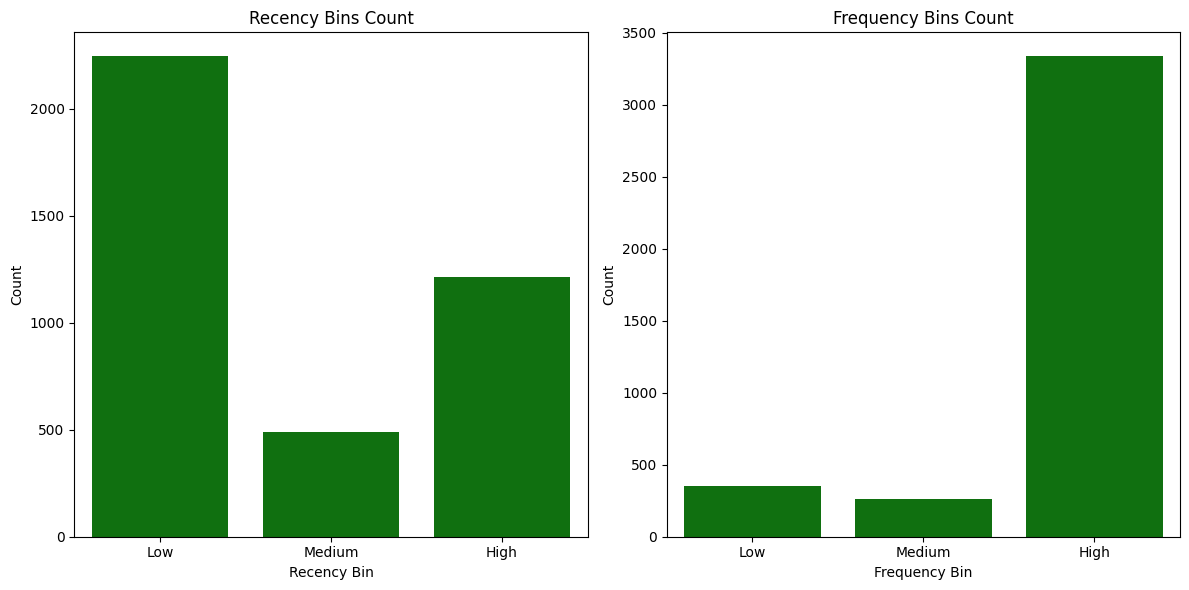

In [ ]:
# Calculate the mean monetary value for each Recency and Frequency bin
mean_monetary_recency = df2.groupby('Rbin_3')['Monetary'].mean().reindex(['Low', 'Medium', 'High'])
mean_monetary_frequency = df2.groupby('Fbin_3')['Monetary'].mean().reindex(['Low', 'Medium', 'High'])
def get_color(value, thresholds=[74.6, 149.2, 223.8, 298.4], colors=['green', 'orange', 'red']):
    if value <= thresholds[0]:
        return colors[0]
    elif value <= thresholds[1]:
        return colors[1]
    elif value <= thresholds[2]:
        return colors[2]
    else:
        return colors[2]  # Adjust this as necessary
# Apply the color mapping function to mean_monetary_recency and mean_monetary_frequency
recency_colors = [get_color(value) for value in mean_monetary_recency]
frequency_colors = [get_color(value) for value in mean_monetary_frequency]
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Recency bar plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
recency_plot = sns.barplot(x=mean_monetary_recency.index, y=df2['Rbin_3'].value_counts().reindex(['Low', 'Medium', 'High']),
                           palette=recency_colors)
plt.title('Recency Bins Count')
plt.xlabel('Recency Bin')
plt.ylabel('Count')

# Plot Frequency bar plot
plt.subplot(1, 2, 2)
frequency_plot = sns.barplot(x=mean_monetary_frequency.index, y=df2['Fbin_3'].value_counts().reindex(['Low', 'Medium', 'High']),
                             palette=frequency_colors)
plt.title('Frequency Bins Count')
plt.xlabel('Frequency Bin')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


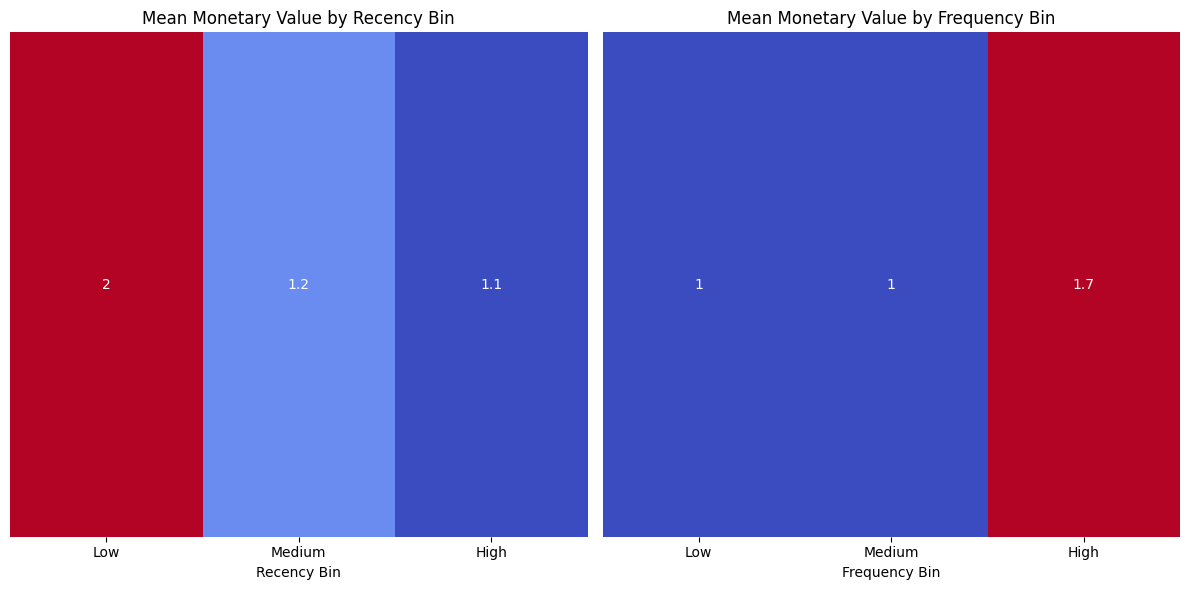

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated mean_monetary_recency and mean_monetary_frequency

# Create a heatmap for mean monetary value by Recency and Frequency bins
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(mean_monetary_recency.to_frame().T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Mean Monetary Value by Recency Bin')
plt.xlabel('Recency Bin')
plt.yticks([])

plt.subplot(1, 2, 2)
sns.heatmap(mean_monetary_frequency.to_frame().T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Mean Monetary Value by Frequency Bin')
plt.xlabel('Frequency Bin')
plt.yticks([])

plt.tight_layout()
plt.show()
